In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pathlib
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams.update({'font.size': 14})

%matplotlib inline

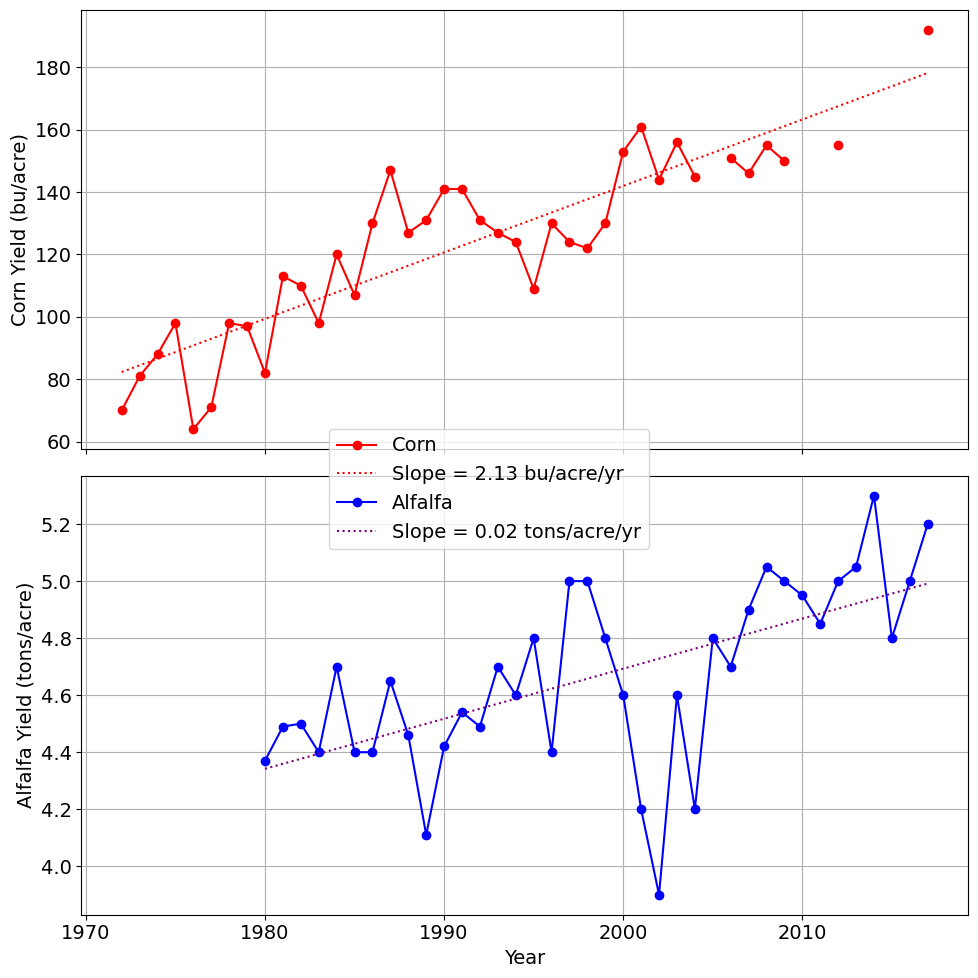

In [21]:
ag = pd.read_csv("Ag_Production.csv",index_col=0)

fig, ax = plt.subplots(2,1,sharex=True,figsize=(10,10))

df1 = ag.dropna(subset=['Corn Yield\n(bu/acre)'])
df2 = ag.dropna(subset=['Alfalfa Yield \n(tons/acre)'])

x1 = df1.index
X1 = sm.add_constant(x1)

x2 = df2.index
X2 = sm.add_constant(x2)

y1 = df1['Corn Yield\n(bu/acre)']
y2 = df2['Alfalfa Yield \n(tons/acre)']

cornmod = sm.OLS(y1,X1).fit()
alfmod = sm.OLS(y2,X2).fit()

# Extract the regression coefficients
cornint, cornslope = cornmod.params
alfint, alfslope = alfmod.params

# Use the model to make predictions
corn_pred = [i*cornslope + cornint for i in x1]
alf_pred = [i*alfslope + alfint for i in x2]


ax[0].plot(ag.index, ag['Corn Yield\n(bu/acre)'], color='red', marker='o',label='Corn')
ax[0].plot(x1, corn_pred, color='red', linestyle=":",
           label=f'Slope = {cornslope:.2f} bu/acre/yr')

ax[1].plot(ag.index, ag['Alfalfa Yield \n(tons/acre)'], color='blue', marker='o',label='Alfalfa')
ax[1].plot(x2, alf_pred, color='purple', linestyle=":",
           label=f'Slope = {alfslope:.2f} tons/acre/yr')


ax[0].set_ylabel('Corn Yield (bu/acre)')
ax[1].set_ylabel('Alfalfa Yield (tons/acre)')
ax[0].grid(True)
ax[1].grid(True)
ax[1].set_xlabel('Year')
fig.legend(loc = 'center')
fig.tight_layout()
#plt.show()
local_path = pathlib.Path(r"C:\Users\paulinkenbrandt\Documents\ArcGIS\Projects\Pahvant\Figures")
fig.savefig(local_path / 'Agricultural Production.png')
fig.savefig(local_path / 'Agricultural Production.pdf')
fig.savefig(local_path / 'Agricultural Production.svg')

In [9]:
5*0.6/12*26000

6500.0